<a href="https://colab.research.google.com/github/25Iqbalhossain/Image_Detection_Cnn/blob/main/Cnn_One_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional  as F
# For CNN Data Set's
from torch.utils.data import DataLoader
from torchvision import datasets,transforms
from torchvision.utils import make_grid


In [2]:
import numpy as np
import pandas as pd
from  sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Covert MNIST Image into Tensor of 4 dimention ( Number of image , height ,width, color channel )

transform = transforms.ToTensor()



In [4]:
# Train Data
train_data= datasets.MNIST(root='/cnn_data',train=True,download=True,transform=transform)

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 140MB/s]


Extracting /cnn_data/MNIST/raw/train-images-idx3-ubyte.gz to /cnn_data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 7.93MB/s]


Extracting /cnn_data/MNIST/raw/train-labels-idx1-ubyte.gz to /cnn_data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 71.3MB/s]


Extracting /cnn_data/MNIST/raw/t10k-images-idx3-ubyte.gz to /cnn_data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 2.68MB/s]


Extracting /cnn_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /cnn_data/MNIST/raw



In [5]:
# test Data
test_data= datasets.MNIST(root='/cnn_data',train=False,download=True,transform=transform)

In [6]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: /cnn_data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [7]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: /cnn_data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [8]:
# create a small batch size of images ...lets say 10
train_loader = DataLoader(train_data,batch_size=10,shuffle=True)
test_loader = DataLoader(test_data,batch_size=10,shuffle=False)

In [9]:
# applying Convolutional layer]
conv1=nn.Conv2d(1,6,3,1)
conv2=nn.Conv2d(6,16,3,1)


In [10]:
# grab 1 MNIST recorde/image
for i,(X_train,y_train) in enumerate(train_data):
    break


In [11]:
X_train.shape

torch.Size([1, 28, 28])

In [12]:
# make it 4 dimentiona
x= X_train.view(1,1,28,28)

In [13]:
# Perfrom our first convolution
x= F.relu(conv1(x))


In [14]:
x.shape

torch.Size([1, 6, 26, 26])

In [15]:
x= F.max_pool2d(x,2,2)

In [16]:
# 26/2=13
x.shape

torch.Size([1, 6, 13, 13])

In [17]:
x=F.relu(conv2(x))

In [18]:
x.shape


torch.Size([1, 16, 11, 11])

In [19]:
x= F.max_pool2d(x,2,2)
x.shape

torch.Size([1, 16, 5, 5])

In [20]:
# Model Class
class ConvulutionalNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1=nn.Conv2d(1,6,3,1)
        self.conv2=nn.Conv2d(6,16,3,1)
        # fully Connected layer
        self.fc1=nn.Linear(5*5*16,120) # Changed input features to 5*5*16 to match the output of the convolutional layers
        self.fc2=nn.Linear(120,84)
        self.fc3=nn.Linear(84,10)
    def forward(self,x):
        x= F.relu(self.conv1(x))
        x= F.max_pool2d(x,2,2)
        # 2nd time
        x= F.relu(self.conv2(x))
        x= F.max_pool2d(x,2,2)
        # flatten
        x= x.view(-1,5*5*16) # Changed to 5*5*16 to match the actual output shape after the convolutional and pooling layers
        x= F.relu(self.fc1(x))
        x= F.relu(self.fc2(x))
        x= self.fc3(x)
        return F.log_softmax(x,dim=1)



In [21]:
# create a instance of model
torch.manual_seed(41)
model= ConvulutionalNetwork()

In [22]:
# loss function optimizer
criterion = nn.CrossEntropyLoss()
optimizer= torch.optim.Adam(model.parameters(),lr=0.001)

In [23]:
import time
start_time = time.time()
#  Create Variables To tracks Things

epocks=5
train_losses=[]
test_losses=[]
train_correct=[]
test_correct=[]

for i in range(epocks):
    trn_corr=0
    tst_corr=0

    #train
    for b,(X_train,y_train) in enumerate(train_loader):
        b+=1
        y_pred=model(X_train)
        loss= criterion(y_pred,y_train)
        predicted= torch.max(y_pred.data,1)[1]
        batch_corr= (predicted==y_train).sum()
        trn_corr+= batch_corr

        # upadate our parameter
        optimizer.zero_grad() # Fixed indentation here
        loss.backward()
        optimizer.step()

        # print out some results
        if b%600 ==0: # Fixed indentation here
            print(f'Epoch :{i} batch :{b} Loss {loss.item()}')

    train_losses.append(loss)
    train_correct.append(trn_corr)
    #test
    with torch.no_grad():
        for b,(X_test,y_test) in enumerate(test_loader):
            y_val= model(X_test)
            predicted= torch.max(y_val.data,1)[1]
            tst_corr+= (predicted==y_test).sum()
        loss= criterion(y_val,y_test)
        test_losses.append(loss)
        test_correct.append(tst_corr)


current_time = time.time()
total_time= current_time-start_time
print(f'Training time {total_time/60 } minutes')



Epoch :0 batch :600 Loss 0.1623610556125641
Epoch :0 batch :1200 Loss 0.1502392590045929
Epoch :0 batch :1800 Loss 0.4744560718536377
Epoch :0 batch :2400 Loss 0.14238706231117249
Epoch :0 batch :3000 Loss 0.007758188061416149
Epoch :0 batch :3600 Loss 0.3836284875869751
Epoch :0 batch :4200 Loss 0.0038223876617848873
Epoch :0 batch :4800 Loss 0.0021286322735249996
Epoch :0 batch :5400 Loss 0.0569545142352581
Epoch :0 batch :6000 Loss 0.00038789428072050214
Epoch :1 batch :600 Loss 0.005851339548826218
Epoch :1 batch :1200 Loss 0.3855525553226471
Epoch :1 batch :1800 Loss 0.004819948226213455
Epoch :1 batch :2400 Loss 0.003216963727027178
Epoch :1 batch :3000 Loss 0.0332382395863533
Epoch :1 batch :3600 Loss 0.5372857451438904
Epoch :1 batch :4200 Loss 0.04561494290828705
Epoch :1 batch :4800 Loss 0.0007510822033509612
Epoch :1 batch :5400 Loss 0.0001173773780465126
Epoch :1 batch :6000 Loss 0.14201366901397705
Epoch :2 batch :600 Loss 0.023733172565698624
Epoch :2 batch :1200 Loss 0.0

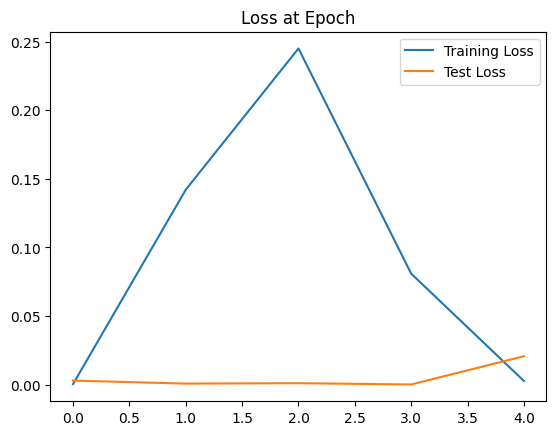

In [25]:
# Graph the loss at epoch
train_losses=[t1.item() for t1 in train_losses]# convert into numpy
plt.plot(train_losses,label='Training Loss')
plt.plot(test_losses,label='Test Loss')
plt.title('Loss at Epoch')
plt.legend()

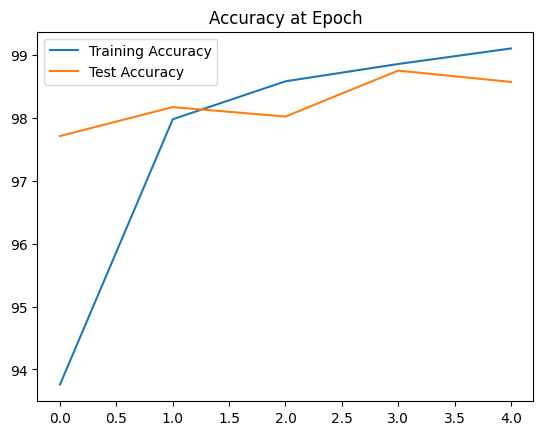

In [28]:
plt.plot([t/600 for t in train_correct],label='Training Accuracy')
plt.plot([t/100 for t in test_correct],label='Test Accuracy')
plt.title('Accuracy at Epoch')
plt.legend()
plt.legend()

In [31]:
test_load_correct=DataLoader(test_data,batch_size=10000,shuffle=False)

In [35]:
with torch.no_grad():
  correct=0
  for X_test,y_test in test_load_correct:
    y_val = model(X_test)
    predicted = torch.max(y_val,1)[1]
    correct+= (predicted == y_test).sum() # Compare predicted with y_test (the actual labels)

In [36]:
correct.item()/len(test_data)*100

98.57000000000001

In [37]:
# grab an image
test_data[4143]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [43]:
test_data[4140][0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

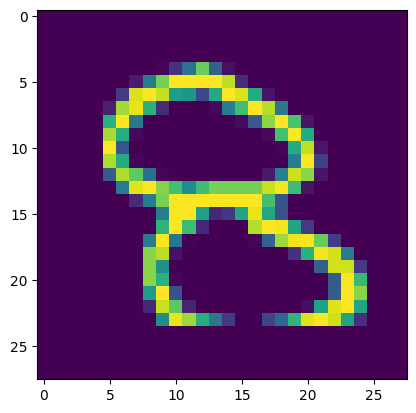

In [44]:
# reshape
test_data[4140][0].view(1,1,28,28).shape
# show the image
plt.imshow(test_data[4140][0].view(28,28))

In [45]:
model.eval()
with torch.no_grad():
  new_pred= model(test_data[4140][0].view(1,1,28,28))


In [46]:
new_pred.argmax()

tensor(8)